# Lab 5 - De la Visualisation au Machine Learning

**Contexte :** Le Lab 4 nous a fourni un jeu de données propre sur les transactions. Notre objectif est maintenant de le "faire parler" en utilisant la visualisation de données, puis de construire un premier modèle de Machine Learning capable de faire des prédictions.

## Étape 1 : Préparation des Données

In [ ]:
import pandas as pd

# Charger les données depuis le lab précédent
df = pd.read_csv('../Lab4-DataWrangling/transactions.csv')

# Ré-appliquer les étapes de nettoyage du Lab 4 (révision)

# 1. Gestion des valeurs manquantes - supprimer les lignes sans quantité
df.dropna(subset=['quantite'], inplace=True)
df['prix_unitaire'] = df['prix_unitaire'].fillna(df['prix_unitaire'].median())

# 2. Correction des types de données
df['date'] = pd.to_datetime(df['date'], format='mixed')
df['quantite'] = df['quantite'].astype(int)

# 3. Création de la colonne 'chiffre_affaires'
df['chiffre_affaires'] = df['quantite'] * df['prix_unitaire']

df.head()

## Étape 2 : Analyse Exploratoire par la Visualisation (EDA)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style des graphiques
sns.set_style("whitegrid")

### Visualisation 1 : Chiffre d'affaires total par catégorie

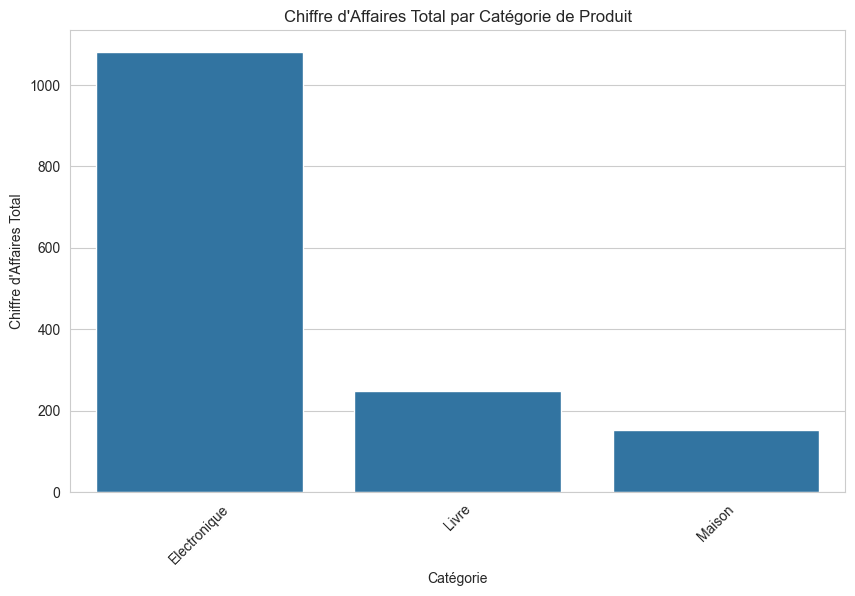

In [3]:
plt.figure(figsize=(10, 6))
sns.barplot(x='categorie', y='chiffre_affaires', data=df, estimator=sum, errorbar=None)
plt.title("Chiffre d'Affaires Total par Catégorie de Produit")
plt.xlabel("Catégorie")
plt.ylabel("Chiffre d'Affaires Total")
plt.xticks(rotation=45)
plt.show()

**Interprétation :** Ce graphique nous montre quelles catégories de produits génèrent le plus de revenus. On peut rapidement identifier les catégories les plus performantes et celles qui le sont moins.

### Visualisation 2 : Évolution du chiffre d'affaires journalier

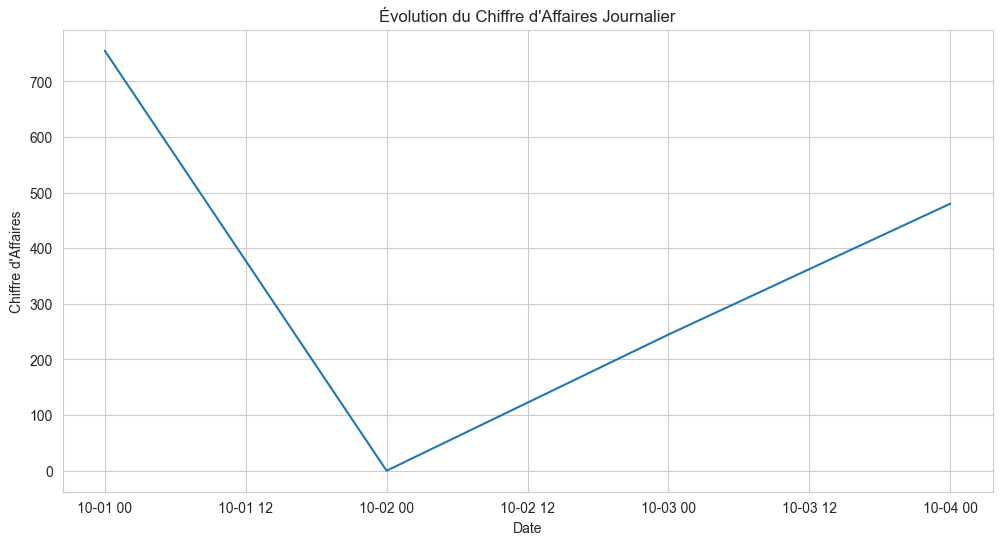

In [4]:
daily_revenue = df.groupby('date')['chiffre_affaires'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='chiffre_affaires', data=daily_revenue)
plt.title("Évolution du Chiffre d'Affaires Journalier")
plt.xlabel("Date")
plt.ylabel("Chiffre d'Affaires")
plt.show()

**Interprétation :** Ce graphique linéaire nous permet de visualiser les tendances des ventes au fil du temps. On peut y repérer des saisonnalités, des pics de vente, ou des périodes de creux.

## Étape 3 : Introduction au Machine Learning - Classification

**Problématique :** Pouvons-nous prédire la `categorie` d'un produit en nous basant uniquement sur son `prix_unitaire` et la `quantite` vendue ?

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Définir les features (X) et la target (y)
features = ['prix_unitaire', 'quantite']
target = 'categorie'

# S'assurer qu'il n'y a pas de valeurs manquantes dans les features
df_clean = df.dropna(subset=features + [target])

X = df_clean[features]
y = df_clean[target]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Entraînement et Évaluation du modèle

In [6]:
# Instancier et entraîner le modèle
model = LogisticRegression()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)

print(f"Précision du modèle : {accuracy:.2f}")

Précision du modèle : 1.00


**Interprétation du score :** Le score de précision (accuracy) nous indique le pourcentage de prédictions correctes que notre modèle a faites sur l'ensemble de test. Un score de 0.80 signifie que le modèle a correctement prédit la catégorie pour 80% des produits de test.

## Conclusion

Félicitations ! Vous avez acquis deux compétences fondamentales en Data Science :
1.  **L'analyse exploratoire par la visualisation**, pour comprendre vos données.
2.  **La modélisation prédictive**, pour utiliser vos données afin de faire des prédictions.

**Lien avec les agents d'IA :**
Ce processus que nous avons mené manuellement peut être entièrement automatisé par un agent d'IA. Imaginez pouvoir demander simplement : "Analyse les ventes du trimestre dernier, identifie les 3 meilleures catégories de produit, et construis un modèle pour prédire la catégorie des nouveaux produits."

Pour ce faire, l'agent utiliserait des **outils** (tools) qui encapsuleraient la logique que nous venons d'écrire avec `pandas`, `seaborn` et `sklearn`. Le rôle de l'agent est d'orchestrer ces outils pour répondre à la demande de l'utilisateur.